**Scaling**

-  we have two types of scaling
-  Z score (Standardization)
-  Min Max (Normalization)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
file_path=r"C:\Users\rahul\Documents\Naresh IT\Data Folder\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_path)
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [23]:
pwage=visa_df['prevailing_wage'].values
pwage

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

-  take pwage data
-  calculate the mean
-  calculate the standard deviation
-  calculate the normalization  ( data - mean)
-  calculate the z_scalar = (data - mean)/std
-  add the column in the df

In [10]:
mean=pwage.mean()
mean

np.float64(74455.81459209183)

In [11]:
std=pwage.std()
std

np.float64(52814.90589711416)

In [12]:
Nr=pwage-mean
Nr

array([-73863.61169209,   8969.83540791,  48541.04540791, ...,
        71843.03540791,  11698.95540791,  -3578.90459209])

In [13]:
z_wage=Nr/std
z_wage

array([-1.39853722,  0.1698353 ,  0.91907852, ...,  1.36027953,
        0.22150859, -0.06776315])

In [14]:
visa_df['z_wage']=z_wage

In [15]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,z_wage
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398537
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169835
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919079
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169994
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428604
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049924
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876159
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360280
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221509


In [17]:
visa_df[['prevailing_wage','z_wage']]

,prevailing_wage,z_wage
0,592.2029,-1.398537
1,83425.6500,0.169835
2,122996.8600,0.919079
3,83434.0300,0.169994
4,149907.3900,1.428604
...,...,...
25475,77092.5700,0.049924
25476,279174.7900,3.876159
25477,146298.8500,1.360280
25478,86154.7700,0.221509


{'whiskers': [<matplotlib.lines.Line2D at 0x22061940a50>,
 'caps': [<matplotlib.lines.Line2D at 0x22061941810>,
 'boxes': [<matplotlib.lines.Line2D at 0x22061940cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x22061941590>],
 'fliers': [<matplotlib.lines.Line2D at 0x22061941450>],
 'means': []}

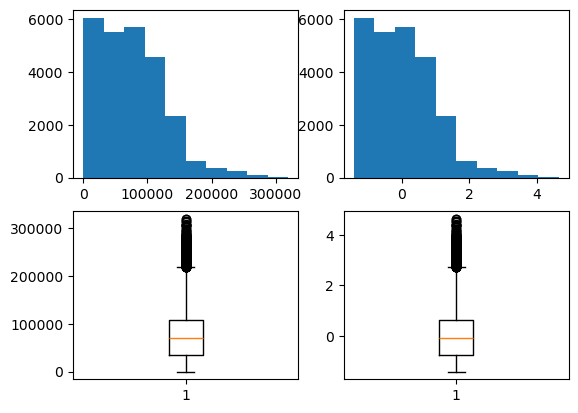

In [27]:
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,2).hist(visa_df['z_wage'])
plt.subplot(2,2,3).boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,4).boxplot(visa_df['z_wage'])

Text(0.5, 1.0, 'z Wage')

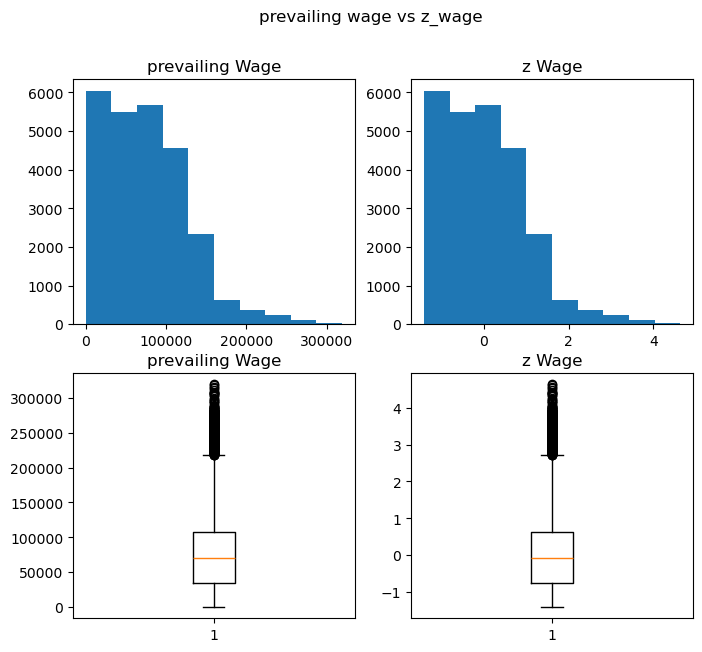

In [31]:
plt.figure(figsize=(8,7))
plt.suptitle('prevailing wage vs z_wage ')
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'])
plt.title('prevailing Wage')
plt.subplot(2,2,2).hist(visa_df['z_wage'])
plt.title('z Wage')
plt.subplot(2,2,3).boxplot(visa_df['prevailing_wage'])
plt.title('prevailing Wage')
plt.subplot(2,2,4).boxplot(visa_df['z_wage'])
plt.title('z Wage')

**StandardScaler**

-  under sklearn
-  preprocessing
-  StandardScalar

In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
wage_ss=ss.fit_transform(visa_df[['prevailing_wage']])
wage_ss

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

In [39]:
visa_df['wage_ss']=wage_ss

In [40]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,z_wage,wage_ss
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398537,-1.398537
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169835,0.169835
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919079,0.919079
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169994,0.169994
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428604,1.428604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049924,0.049924
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876159,3.876159
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360280,1.360280
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221509,0.221509


In [41]:
visa_df[['prevailing_wage','z_wage','wage_ss']]

,prevailing_wage,z_wage,wage_ss
0,592.2029,-1.398537,-1.398537
1,83425.6500,0.169835,0.169835
2,122996.8600,0.919079,0.919079
3,83434.0300,0.169994,0.169994
4,149907.3900,1.428604,1.428604
...,...,...,...
25475,77092.5700,0.049924,0.049924
25476,279174.7900,3.876159,3.876159
25477,146298.8500,1.360280,1.360280
25478,86154.7700,0.221509,0.221509


In [44]:
visa_df['prevailing_wage'].values.reshape(-1,1)

array([[   592.2029],
       [ 83425.65  ],
       [122996.86  ],
       ...,
       [146298.85  ],
       [ 86154.77  ],
       [ 70876.91  ]])

In [46]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit_transform(visa_df['prevailing_wage'].values.reshape(-1,1))

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

**MinMaxScalar**


In [48]:
pwage=visa_df['prevailing_wage']
minimum=pwage.min()
maximum=pwage.max()
Nr=pwage-minimum
Dr=maximum-minimum
Wage_min_max=Nr/Dr

In [49]:
visa_df['Wage_min_max']=Wage_min_max

In [50]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,z_wage,wage_ss,Wage_min_max
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398537,-1.398537,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169835,0.169835,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919079,0.919079,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169994,0.169994,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428604,1.428604,0.469616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049924,0.049924,0.241505
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876159,3.876159,0.874579
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360280,1.360280,0.458311
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221509,0.221509,0.269895


In [55]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
Min_Max=MM.fit_transform(visa_df[['prevailing_wage']])
Min_Max

array([[0.00184853],
       [0.2613452 ],
       [0.385312  ],
       ...,
       [0.45831136],
       [0.26989486],
       [0.22203311]])

In [56]:
visa_df['Min_Max']=Min_Max

In [57]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,z_wage,wage_ss,Wage_min_max,Min_Max
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398537,-1.398537,0.001849,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169835,0.169835,0.261345,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919079,0.919079,0.385312,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169994,0.169994,0.261371,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428604,1.428604,0.469616,0.469616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049924,0.049924,0.241505,0.241505
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876159,3.876159,0.874579,0.874579
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360280,1.360280,0.458311,0.458311
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221509,0.221509,0.269895,0.269895


In [60]:
visa_df['Wage_min_max'].max()

1.0

In [62]:
visa_df['Wage_min_max'].min()

0.0

In [66]:
visa_df['Min_Max'].max()

0.9999999999999999

In [63]:
visa_df['Min_Max'].min()

0.0

In [67]:
max(Min_Max)

array([1.])